In [1]:
import os
import tensorflow as tf

sets an environment variable for TensorFlow Hub (TFHUB_MODEL_LOAD_FORMAT) to specify the format in which models from TensorFlow Hub should be loaded. In this case, the format is set to 'COMPRESSED'. This may be useful for controlling how the model files are loaded, potentially impacting the speed or efficiency of the loading process.

In [2]:
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

the default figure size and turns off the grid in Matplotlib using rcParams. Specifically, it configures the figure size to be 12 inches by 12 inches with the line:
This means that any subsequent Matplotlib figures created will have this default size unless otherwise specified
turns off the grid in Matplotlib plots by default.

These settings can be particularly useful for creating consistent visualizations throughout a notebook or script.


In [3]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

These libraries can be useful for tasks related to image processing, numerical operations, and function manipulation. However, the specific usage of these libraries in the code is not provided, so the exact purpose of their inclusion cannot be determined without additional context.

In [4]:
import numpy as np
import PIL.Image
import time
import functools

This function is designed to handle tensors representing images and is suitable for converting them to PIL Images. It's important to note that the function assumes that the input tensor is in an appropriate format for image conversion.

In [5]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

This function is designed for loading and preparing images for further processing, especially in the context of machine learning applications.



In [6]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img


This function is designed to handle images with an additional batch dimension. If the image has more than three dimensions (indicating a batch dimension), it removes the batch dimension before displaying the image using Matplotlib.

In [7]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)


These images are likely intended for use in a neural style transfer application. Neural style transfer involves blending the content of one image with the style of another to create a visually appealing result. The loaded images are commonly referred to as the "content image" and the "style image" in the context of style transfer.

It's important to note that the success of neural style transfer depends on the characteristics of the chosen content and style images. Experimenting with different combinations of images and tuning parameters can lead to diverse and interesting artistic results.

In [8]:
content_image = load_img('/content/dp.jpg')
style_image = load_img('/content/16-year-old-artist-dimitra-milan-fb-png__700.jpg')

This is a common approach when working with subplots in Matplotlib. The subplot function is used to specify the layout of the subplots, and in this case, it creates a single row with two columns. The third argument 2 indicates that the current subplot is the second one.

After setting up the subplot, the imshow function is used to display the "Style Image" in the selected subplot.

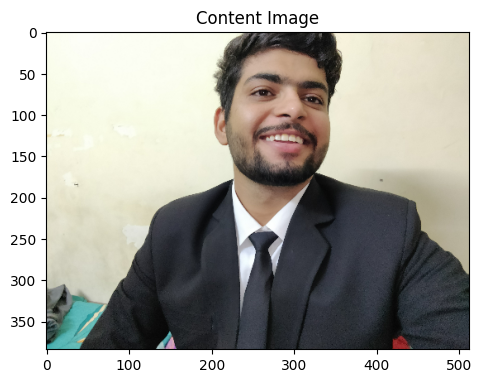

In [9]:

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

The provided code utilizes the TensorFlow Hub module for arbitrary image stylization. It loads a pre-trained model using the URL 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'. The stylized image is generated by passing the content image and style image tensors to the loaded model.

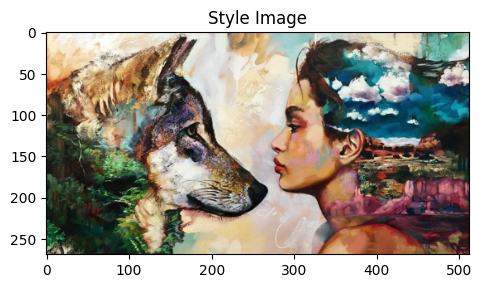

In [10]:
plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

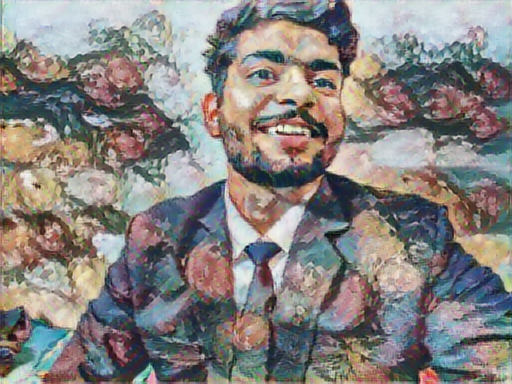

In [11]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)